## Observations and Insights 

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
mousestudy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [105]:
# Checking the number of mice in the DataFrame.
mousestudy_df["Mouse ID"].nunique()

249

In [106]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicatemice_df = mousestudy_df[mousestudy_df.duplicated(['Mouse ID','Timepoint'])]


In [107]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatemice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [108]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousestudy_df[mousestudy_df['Mouse ID'] == 'g989' ].index
mousestudy_df= mousestudy_df.drop(mousestudy_df[mousestudy_df['Mouse ID'] == 'g989' ].index)
mousestudy_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [109]:
# Checking the number of mice in the clean DataFrame.
mousestudy_df.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [110]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#mean
Tumor_group_df = mousestudy_df.groupby('Drug Regimen')
mean = Tumor_group_df ["Tumor Volume (mm3)"].mean()
#median
median = Tumor_group_df ["Tumor Volume (mm3)"].median()
#sem
sem_df= Tumor_group_df ["Tumor Volume (mm3)"].sem()
#variance
variance = Tumor_group_df ["Tumor Volume (mm3)"].var()
#standard deviation
deviation = Tumor_group_df ["Tumor Volume (mm3)"].std()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
total_df = pd.DataFrame({"Mean": mean, "Median":median, "Variance": variance,"SEM":sem_df,"Deviation":deviation})
total_df                                               


,Mean,Median,Variance,SEM,Deviation
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,4.994774
Ceftamin,52.591172,51.776157,39.290177,0.469821,6.268188
Infubinol,52.884795,51.820584,43.128684,0.492236,6.567243
Ketapril,55.235638,53.698743,68.553577,0.603860,8.279709
Naftisol,54.331565,52.509285,66.173479,0.596466,8.134708
Placebo,54.033581,52.288934,61.168083,0.581331,7.821003
Propriva,52.320930,50.446266,43.852013,0.544332,6.622085
Ramicane,40.216745,40.673236,23.486704,0.320955,4.846308
Stelasyn,54.233149,52.431737,59.450562,0.573111,7.710419


In [111]:
sem = pd.DataFrame(Tumor_group_df["Tumor Volume (mm3)"].sem())
sem.head()

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466


## Bar Plots

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Name: Mouse ID, dtype: int64


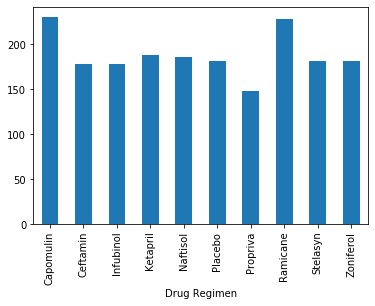

In [112]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mice = mousestudy_df.groupby(["Drug Regimen"])["Mouse ID"].count()                                             
print(mice.head())
mice.plot.bar(rot=90)

In [113]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(10,7))

#Define each drug
error = mousestudy_df["Tumor Volume (mm3)"]["Capomulin"]
Capomulin = plt.errorbar(x_axis, mousestudy_df["Capomulin"], yerr=error, fmt="o", color="red", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = mousestudy_df["Tumor Volume (mm3)"]["Infubinol"]
Infubinol = plt.errorbar(x_axis, mousestudy_df["Infubinol"], yerr=error, fmt="^", color="blue", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = mousestudy_df["Tumor Volume (mm3)"]["Ketapril"]
Ketapril = plt.errorbar(x_axis, mousestudy_df["Ketapril"], yerr=error, fmt="s", color="green", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = mousestudy_df["Tumor Volume (mm3)"]["Placebo"]
Placebo = plt.errorbar(x_axis, mousestudy_df["Placebo"], yerr=error, fmt="D", color="black", ls="dashed", linewidth=1, alpha=1, capsize=3)

#Axes limits
plt.ylim(20, 80)
plt.xlim(0, 45)

#Axes and Chart Labels
plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)
plt.bar

#Chart Legend 
plt.legend((Capomulin, Infubinol, Ketapril, Placebo), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

KeyError: 'Capomulin'

<Figure size 720x504 with 0 Axes>

## Pie Plots

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = mousestudy_df["Sex"].count()
sex
sex_df = pd.DataFrame(Sex)
sex_df
plot = sex_df.plot.pie(y="Sex", figsize=(5, 5))

NameError: name 'Sex' is not defined

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender=list(sex_grp_count.index.values)
pie_values=sex_grp_count["Sex"]
colors=["lightblue", "orange"]
plt.pie(pie_values, labels=gender,colors=colors,autopct="%1.1f%%", shadow=True, startangle=140,
plt.rcParams['font.size']=16)
#plt.title=("Distribution of Female Versus Male Mice")
#plt.ylabel=("Sex")       
#plt.axis('equal')
plt.show()

SyntaxError: keyword can't be an expression (<ipython-input-115-ea41a232ac33>, line 6)

## Quartiles, Outliers and Boxplots

In [116]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [117]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

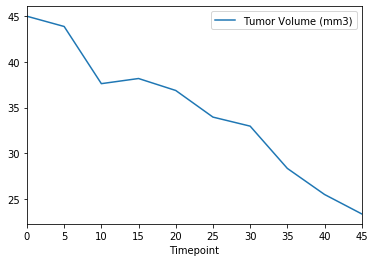

In [118]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capsamples= mousestudy_df[mousestudy_df["Drug Regimen"] == "Capomulin"]
capsample= mousestudy_df[mousestudy_df["Mouse ID"]== "s185"]
x_values=mousestudy_df["Timepoint"]
y_values=mousestudy_df["Tumor Volume (mm3)"]
capsample.plot(x="Timepoint", y="Tumor Volume (mm3)")


   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14           36.866876                 0  


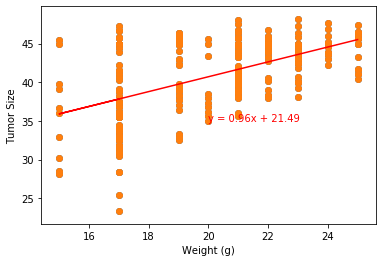

In [120]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
print(capsamples.head())
x_values=capsamples["Weight (g)"]
y_values=capsamples["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)

# Calculate the correlation coefficient and linear regression modelfor mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=10,color="red")


plt.xlabel("Weight (g)")
plt.ylabel("Tumor Size")
plt.show()


## Correlation and Regression

In [ ]:
#see above